# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.ensemble import RandomForestRegressor

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
## Load the Boston Housing Prices dataset
boston_housing = pd.read_csv('boston_data.csv')

boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston_housing.shape

(404, 14)

### Explore the data

In [4]:
boston_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [5]:
boston_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    float64
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   rad      404 non-null    float64
 9   tax      404 non-null    float64
 10  ptratio  404 non-null    float64
 11  black    404 non-null    float64
 12  lstat    404 non-null    float64
 13  medv     404 non-null    float64
dtypes: float64(14)
memory usage: 44.3 KB


In [6]:
boston_housing.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

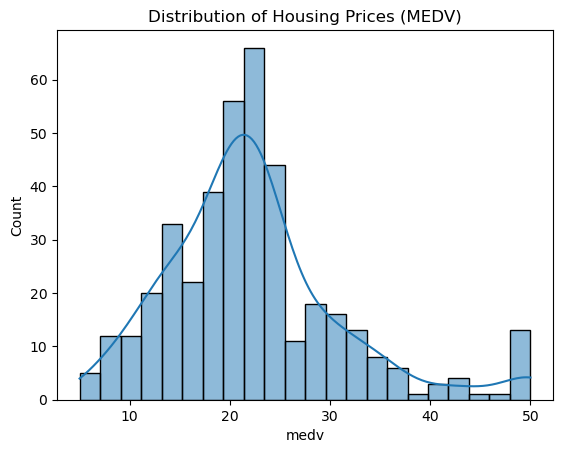

In [7]:

# Visualize the distribution of the target variable (MEDV)
sns.histplot(boston_housing['medv'], kde=True)
plt.title('Distribution of Housing Prices (MEDV)')
plt.show()

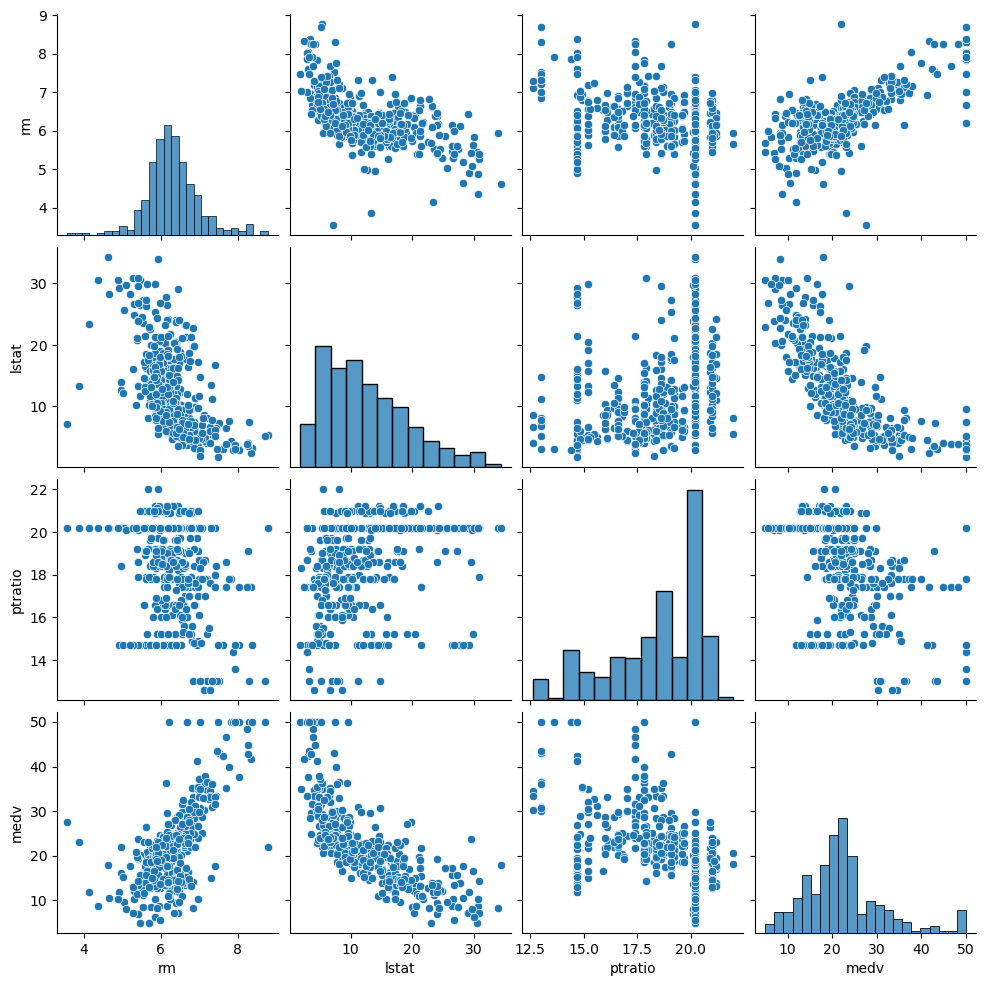

In [8]:
# Visualize relationships between features and target variable
sns.pairplot(boston_housing[['rm', 'lstat', 'ptratio', 'medv']])
plt.show()

In [9]:
# Identify and handle outliers using Z-score
z_scores = np.abs(zscore(boston_housing))
boston_housing_cleaned = boston_housing[(z_scores < 3).all(axis=1)]

In [10]:
# Check the shape of the cleaned data
print("Shape of the original data:", boston_housing.shape)
print("Shape of the cleaned data:", boston_housing_cleaned.shape)

Shape of the original data: (404, 14)
Shape of the cleaned data: (321, 14)


In [11]:
# Check for missing values
missing_values = boston_housing_cleaned.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

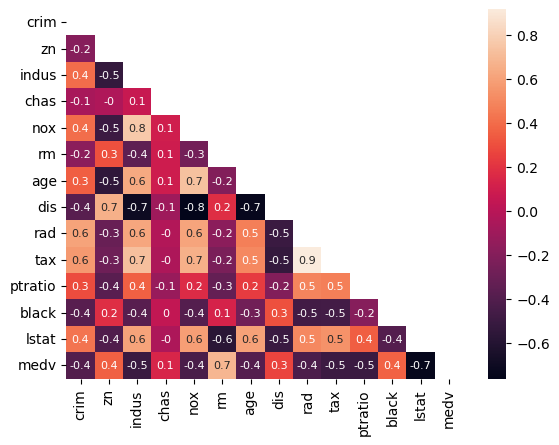

In [12]:
corr = boston_housing.corr()

mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, annot = np.round(corr, 1), annot_kws = {"size": 8})

plt.show()

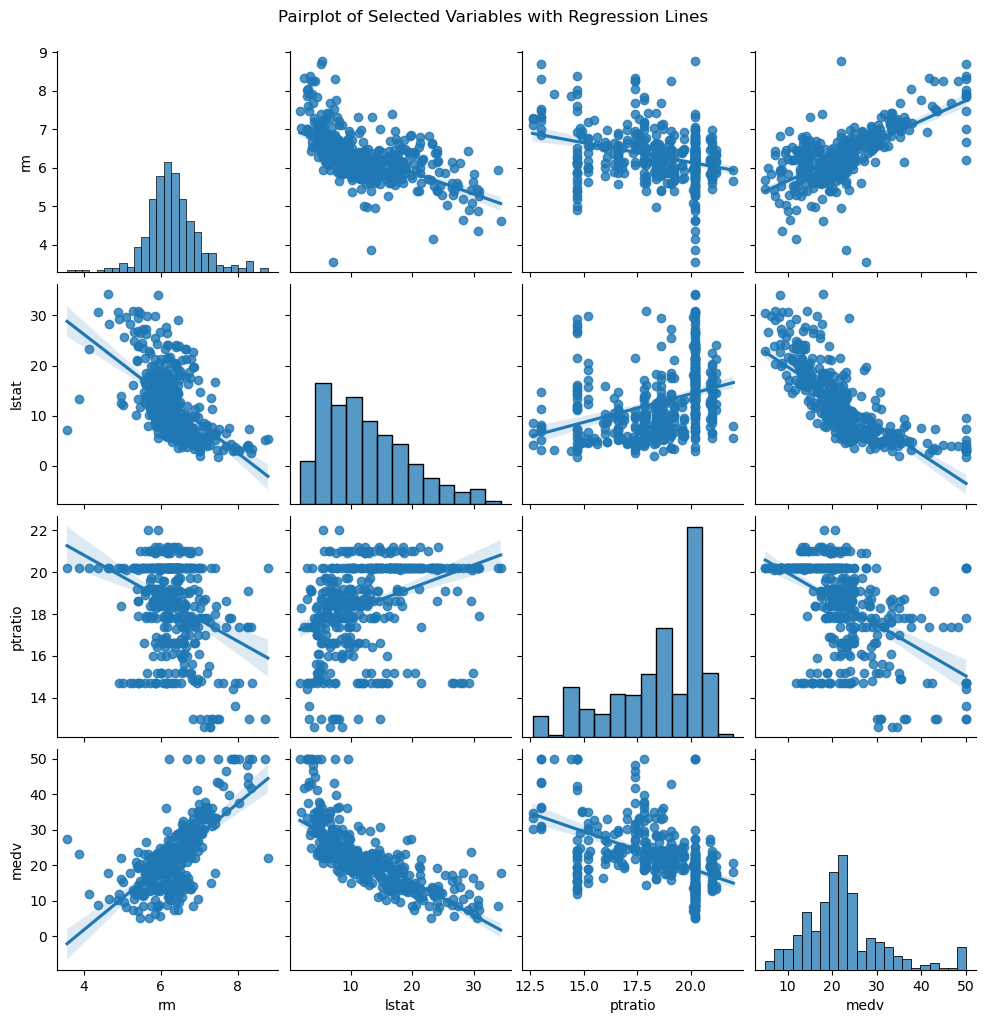

In [13]:
# Select most correlated variables for analysis
selected_variables = ['rm', 'lstat', 'ptratio', 'medv']

# Pairplot with regression line
sns.pairplot(boston_housing[selected_variables], kind='reg')
plt.suptitle("Pairplot of Selected Variables with Regression Lines", y=1.02)
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [14]:
# These relationships are what we would expect to see based on previous research and 
#common sense: areas with higher non-retail business acreage, higher nitric oxides 
#concentration, lower average number of rooms, higher proportion of older homes, and 
#higher proportion of lower-income residents are generally less desirable and therefore 
#have lower housing prices.


### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

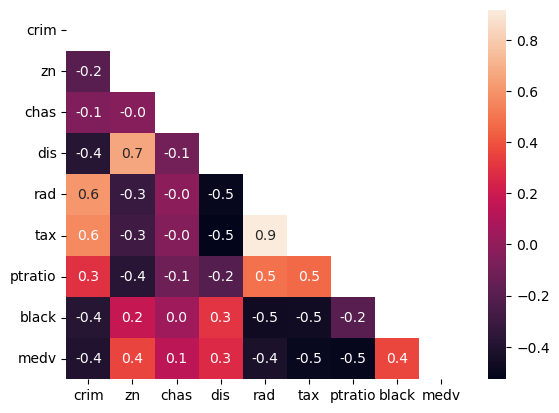

In [15]:
remaining_vars = boston_housing[[var for var in boston_housing.columns if var not in ['indus', 'nox', 'rm', 'age', 'lstat']]]

remaining_corr = remaining_vars.corr()

mask = np.zeros_like(remaining_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(remaining_corr, annot = True, mask = mask, fmt = '.1f')

plt.show()

# There are no other variables that have a very high correlation with MEDV.

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [16]:
# After we've taken care of the outliers (also those in MEDV)

medv = boston_housing['medv']

min_medv = medv.min()
max_medv = medv.max()
mean_medv = medv.mean()
median_medv = medv.median()
std_medv = medv.std()

print('Minimum housing price:', min_medv)
print('Maximum housing price:', max_medv)
print('Mean housing price:', mean_medv)
print('Median housing price:', median_medv)
print('Standard deviation of housing price:', std_medv)

Minimum housing price: 5.0
Maximum housing price: 50.0
Mean housing price: 22.312376237623763
Median housing price: 21.4
Standard deviation of housing price: 8.837018646457969


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [19]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    return r2_score(y_true, y_predict)


### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [21]:
X = boston_housing.drop('medv', axis = 1)
y = boston_housing['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.8)

X_train, y_train = shuffle(X_train, y_train, random_state = 0)
X_test, y_test = shuffle(X_test, y_test, random_state = 0)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [22]:
# Five separate RFR here with the given max depths
rf_depth_2 = RandomForestRegressor(max_depth = 2)
rf_depth_4 = RandomForestRegressor(max_depth = 4)
rf_depth_6 = RandomForestRegressor(max_depth = 6)
rf_depth_8 = RandomForestRegressor(max_depth = 8)
rf_depth_10 = RandomForestRegressor(max_depth = 10)

forests = [rf_depth_2, rf_depth_4, rf_depth_6, rf_depth_8, rf_depth_10]

[rf.fit(X_train, y_train) for rf in forests]

[RandomForestRegressor(max_depth=2),
 RandomForestRegressor(max_depth=4),
 RandomForestRegressor(max_depth=6),
 RandomForestRegressor(max_depth=8),
 RandomForestRegressor(max_depth=10)]

Now, plot the score for each tree on the training set and on the testing set.

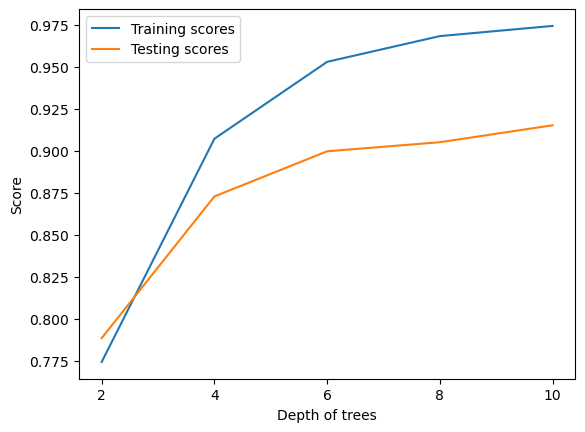

In [23]:
# Produce a plot with the score for the testing and training for the different max depths
training_scores = [performance_metric(y_train, rf.predict(X_train)) for rf in forests]
testing_scores = [performance_metric(y_test, rf.predict(X_test)) for rf in forests]

plt.plot(training_scores, label = 'Training scores')
plt.plot(testing_scores, label = 'Testing scores')

plt.xticks([0, 1, 2, 3, 4], [2, 4, 6, 8, 10])
plt.xlabel('Depth of trees')
plt.ylabel('Score')

plt.legend()
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Intially we can see that the performance on the testing data initially improves and then it decreases after it reaches to certain point.
# So we can conclude that the model is overfitting to the training data when the depth of the trees becomes too large.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# When the model is trained with a maximum depth of 1, it suffers from high bias.
# When the model is trained with a maximum depth of 10, it suffers from high variance.


### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
#The model crafted from 1978 data might not align with today's reality, given the probable shifts in real estate prices and the factors influencing them over time.
#The features employed to characterize a home in the model might fall short in accurately portraying a real-world residence. Other crucial factors may be in the mix, demanding consideration.
#The model's performance, gauged through the R^2 score, might lack the robustness required for steadfast predictions. Potential issues like overfitting or underfitting could influence its consistency.
#Applying real estate price insights from urban hubs like Boston to a rural setting may prove irrelevant. The dynamics influencing property prices often diverge significantly between these two distinct locations.